# 目录
+ 1 载入必要的包
+ 2 特征的含义
+ 3 初步观察数据的状况
+ 4 可视化描述性统计
    + 4.1 类别特征
    + 4.2 数值特征
    + 4.3 暂时不用的特征
+ 5 初步特征工程
    + 5.1 Fare
    + 5.2 Pclass
    + 5.3 Sex
    + 5.4 Age
    + 5.5 Cabin
    + 5.6 Embarked
+ 6 建立基线模型
    + 6.1 随机森林
    + 6.2 GBM
    + 6.3 XGBoost
+ 7 进一步特征工程
    + 7.1 Family_size
    + 7.2 Name_len
    + 7.3 根据年龄段进行编码
    + 7.4 Title
    + 7.5 按照年龄和性别及舱室级别进行编码
    + 7.6 将特征工程的所有步骤写成函数

# 1 载入必要的包

In [1]:
import numpy as np
from pandas import Series, DataFrame
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing

C:\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# 2 特征的含义

+ PassengerId -- A numerical id assigned to each passenger.
+ Survived -- Whether the passenger survived (1), or didn't (0). We'll be making predictions for this column.
+ Pclass -- The class the passenger was in -- first class (1), second class (2), or third class (3).
+ Name -- the name of the passenger.
+ Sex -- The gender of the passenger -- male or female.
+ Age -- The age of the passenger. Fractional.
+ SibSp -- The number of siblings and spouses the passenger had on board.
+ Parch -- The number of parents and children the passenger had on board.
+ Ticket -- The ticket number of the passenger.
+ Fare -- How much the passenger paid for the ticker.
+ Cabin -- Which cabin the passenger was in.
+ Embarked -- Where the passenger boarded the Titanic.

# 3 初步观察数据的状况

In [4]:
titanic = pd.read_csv('../data/train.csv')

In [5]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


响应变量：``Survived``  
数值特征：``PassengerId`` 、 ``Age`` 、 ``SibSp`` 、 ``Parch`` 、 ``Fare``，其中 ``Age`` 、 ``Fare``特征有缺失值  
类别特征：``Pclass`` 、 ``Name`` 、 ``Sex`` 、 ``Ticket`` 、 ``Cabin`` 、 ``Embarked``

# 4 可视化描述性统计

## 4.1 类别特征

类别特征：``Pclass`` 、 ``Name`` 、 ``Sex`` 、 ``Ticket`` 、 ``Cabin`` 、 ``Embarked``

暂时分析以下4个特征：``Pclass`` 、 ``Sex`` 、 ``Cabin`` 、 ``Embarked``

In [8]:
Cabin_notnull = titanic.Cabin.notnull().astype(int)

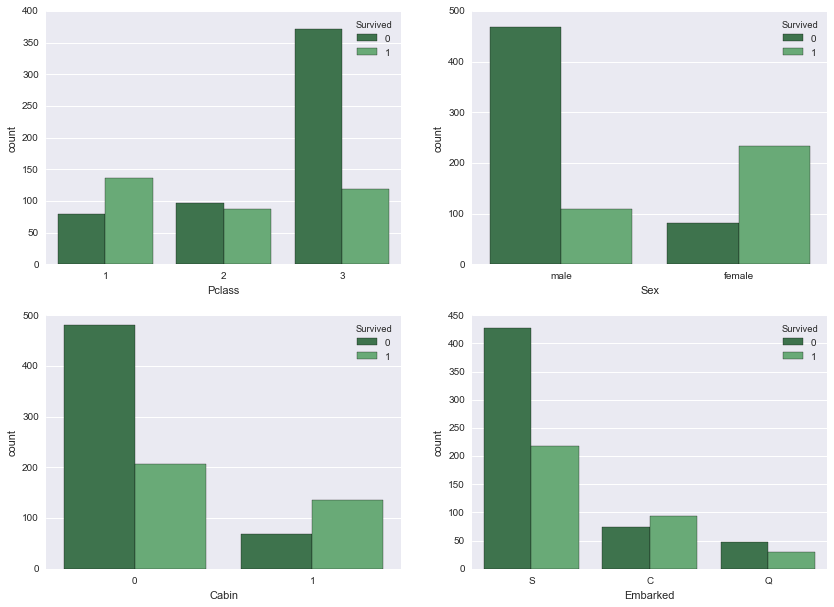

In [9]:
fig = plt.figure(figsize=(14,10))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)
sns.countplot(x="Pclass", hue="Survived", data=titanic, palette="Greens_d", ax=ax1)
sns.countplot(x="Sex", hue="Survived", data=titanic, palette="Greens_d", ax=ax2)
sns.countplot(x=Cabin_notnull, hue=titanic.Survived, palette="Greens_d", ax=ax3)
sns.countplot(x="Embarked", hue="Survived", data=titanic, palette="Greens_d", ax=ax4);

舱室级别越高，生存率越高  
女性生存率较高  
Cabin缺失，生存率较低  
Embarked特征有两个缺失值，影响不大，后续准备用'S'填充缺失值

## 4.2 数值特征

数值特征：``Age`` 、 ``SibSp`` 、 ``Parch`` 、 ``Fare``，其中 ``Age`` 、 ``Fare``特征有缺失值

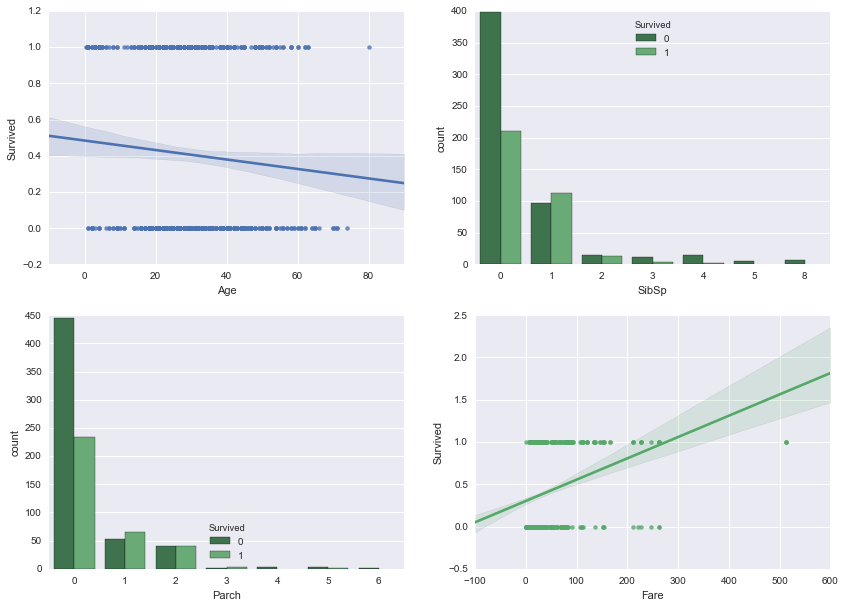

In [10]:
fig = plt.figure(figsize=(14,10))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)
sns.regplot(x="Age", y="Survived", data=titanic, ax=ax1)
sns.countplot(x="SibSp", hue="Survived", data=titanic, palette="Greens_d", ax=ax2)
sns.countplot(x="Parch", hue="Survived", data=titanic, palette="Greens_d", ax=ax3)
sns.regplot(x="Fare", y="Survived", data=titanic, ax=ax4);

年龄似乎与生存率负相关  
有1个或2个兄弟姐妹，生存率较高，0个、3个或以上，生存率下降，呈抛物线形式  
有1、2、3个父母、孩子，生存率较高  
船费越高，生存率越高

## 4.3 暂时不用的特征
``Name`` 、 ``Ticket``

# 5 初步特征工程

+ 初步考虑使用以下8个特征：``Age`` 、 ``SibSp`` 、 ``Parch`` 、 ``Fare`` 、 ``Pclass`` 、 ``Sex`` 、 ``Cabin`` 、 ``Embarked`` ， ``Name`` 、 ``Ticket`` 特征暂时不用，有待后续挖掘


+ 直接可以拿来用的特征有2个：``SibSp`` 、``Parch``


+ 待处理的特征有6个： ``Fare`` 填补缺失值 、 ``Pclass`` 进行独热编码 ``Pclass_1, Pclass_2, Pclass_3``、 ``Sex``进行二值编码、``Age``用中位数填补缺失值、``Cabin``根据是否缺失编码、``Embarked``填补缺失值后独热编码

## 5.1 Fare
填补缺失值

In [11]:
Fare_fillna = preprocessing.Imputer(strategy='median')
Fare_fillna.fit(titanic[['Fare']])

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [12]:
titanic[['Fare']] = Fare_fillna.transform(titanic[['Fare']])
titanic[['Fare']].isnull().sum() # 确认没有缺失值

Fare    0
dtype: int64

## 5.2 Pclass
独热编码 Pclass_1, Pclass_2, Pclass_3

In [13]:
Pclass_encoder = preprocessing.OneHotEncoder(sparse=False)
Pclass_encoder.fit(titanic[['Pclass']])

OneHotEncoder(categorical_features='all', dtype=<type 'numpy.float64'>,
       handle_unknown='error', n_values='auto', sparse=False)

In [14]:
Pclass = Pclass_encoder.transform(titanic[['Pclass']])
Pclass = DataFrame(Pclass)
Pclass.columns = ['Pclass_1', 'Pclass_2', 'Pclass_3']

In [15]:
titanic = pd.concat([titanic, Pclass], axis=1) # 将独热编码生成的3列特征加入原数据集
titanic.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass_1,Pclass_2,Pclass_3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,0.0,0.0,1.0


## 5.3 Sex
二值编码

In [16]:
Sex_encoder = preprocessing.LabelBinarizer()
Sex_encoder.fit(titanic[['Sex']])

LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)

In [17]:
Sex_encode = Sex_encoder.transform(titanic[['Sex']])
Sex_encode = DataFrame(Sex_encode)
Sex_encode.columns = ['Sex_encode']

In [18]:
titanic = pd.concat([titanic, Sex_encode], axis=1)
titanic.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass_1,Pclass_2,Pclass_3,Sex_encode
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,0.0,0.0,1.0,1


## 5.4 Age
用中位数填补缺失值

In [19]:
Age_fillna = preprocessing.Imputer(strategy='median')
Age_fillna.fit(titanic[['Age']])

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [20]:
titanic[['Age']] = Age_fillna.transform(titanic[['Age']])
titanic[['Age']].isnull().sum() # 确保没有缺失值

Age    0
dtype: int64

## 5.5 Cabin
Cabin根据是否缺失编码

In [22]:
titanic['Cabin_notnull'] = titanic['Cabin'].notnull().astype(int)
titanic['Cabin_notnull'].unique() # 0、1编码

array([0, 1], dtype=int64)

## 5.6 Embarked

In [23]:
titanic.ix[titanic.Embarked.isnull(), 'Embarked'] = 'S' # 用'S'填补缺失值

In [24]:
Embarked_encoder = preprocessing.LabelBinarizer()
Embarked_encoder.fit(titanic.Embarked)

LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)

In [25]:
Embarked = Embarked_encoder.transform(titanic.Embarked)
Embarked = DataFrame(Embarked)
Embarked.columns = ['Embarked_C', 'Embarked_Q', 'Embarked_S']

In [26]:
titanic = pd.concat([titanic, Embarked], axis=1)
titanic.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass_1,Pclass_2,Pclass_3,Sex_encode,Cabin_notnull,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,0.0,0.0,1.0,1,0,0,0,1


In [27]:
raw_predictors = [
    'Age',
    'SibSp',
    'Parch',
    'Fare',
    'Pclass_1',
    'Pclass_2',
    'Pclass_3',
    'Sex_encode',
    'Cabin_notnull',
    'Embarked_C',
    'Embarked_Q',
    'Embarked_S'
]

# 6 建立基线模型

In [28]:
def modelfit(alg, dtrain, y, predictor, performCV=True, printFeatureImportance=True, cv_folds=5):
    # 训练模型
    alg.fit(dtrain[predictor], y)

    if performCV:
    # 交叉验证评分
        cv_score = model_selection.cross_val_score(alg, dtrain[predictor], y, cv=cv_folds, scoring='accuracy')
    
    # 输出交叉验证结果
        print "CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score))

    # 输出特征重要性评分
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, predictor).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')

## 6.1 随机森林

CV Score : Mean - 0.8013974 | Std - 0.03113943 | Min - 0.7696629 | Max - 0.8539326


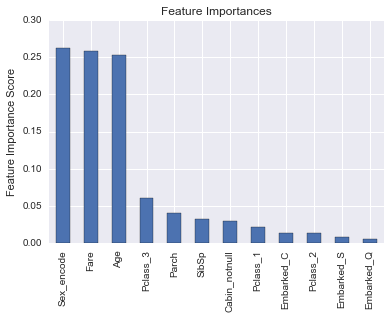

In [29]:
rf0 = RandomForestClassifier(random_state=1234)
modelfit(rf0, titanic, titanic['Survived'], raw_predictors)

## 6.2 GBM

CV Score : Mean - 0.8260983 | Std - 0.01960792 | Min - 0.8033708 | Max - 0.8587571


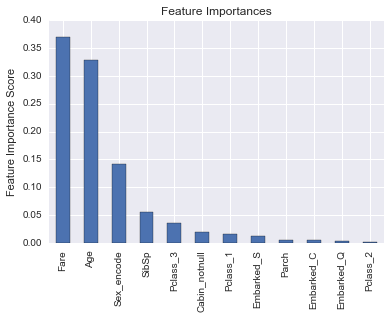

In [30]:
gbm0 = GradientBoostingClassifier(random_state=1234)
modelfit(gbm0, titanic, titanic['Survived'], raw_predictors)

## 6.3 XGBoost

CV Score : Mean - 0.8272281 | Std - 0.02397257 | Min - 0.8033708 | Max - 0.8595506


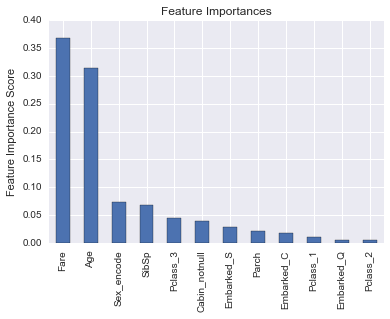

In [31]:
xgb0 = XGBClassifier(seed=1234)
modelfit(xgb0, titanic, titanic['Survived'], raw_predictors)

可见，随机森林—>GBM—>XGBoost的交叉验证效果逐步提高

# 7 进一步特征工程

考虑增加以下几个特征：  
家庭成员个数：``Family_size``，``SibSp`` 和 ``Parch`` 之和  
姓名的长度：``Name_len``  
根据年龄段进行编码：``Age_Child`` ， ``Age_Teenager`` ， ``Age_Youth`` ， ``Age_Middleaged`` ， ``Age_Lesselder`` ， ``Age_Elder``   
头衔：``Title``

In [32]:
titanic.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass_1,Pclass_2,Pclass_3,Sex_encode,Cabin_notnull,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,0.0,0.0,1.0,1,0,0,0,1


## 7.1 Family_size
``SibSp`` 和 ``Parch`` 之和

In [33]:
titanic['Family_size'] = titanic['SibSp'] + titanic['Parch']

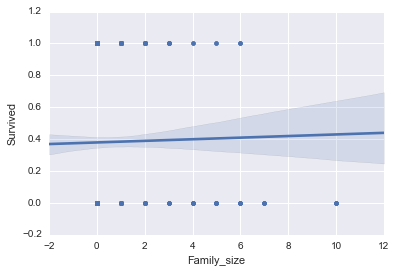

In [34]:
sns.regplot(x="Family_size", y="Survived", data=titanic); # Family_size对生存率的影响似乎是中性的，但是先暂时放进模型中

## 7.2 Name_len

In [35]:
titanic['Name_len'] = titanic['Name'].map(len)

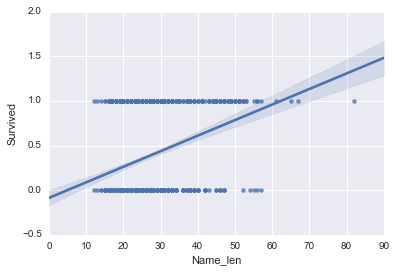

In [36]:
sns.regplot(x=titanic['Name_len'], y="Survived", data=titanic); # Name的长度和生存率似乎正相关

## 7.3 根据年龄段进行编码
``Age_Child`` ， ``Age_Teenager`` ， ``Age_Youth`` ， ``Age_Middleaged`` ， ``Age_Lesselder`` ， ``Age_Elder``

In [37]:
bins = [0, 12, 60, 100]
group_names = ['Age_Child', 'Age_Adult', 'Age_Elder']
age_cut = pd.get_dummies(pd.cut(titanic.Age, bins, labels=group_names)).astype(int)

In [38]:
titanic = pd.concat([titanic, age_cut], axis=1)
titanic.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Sex_encode,Cabin_notnull,Embarked_C,Embarked_Q,Embarked_S,Family_size,Name_len,Age_Child,Age_Adult,Age_Elder
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,...,1,0,0,0,1,1,23,0,1,0


## 7.4 Title

In [39]:
import re

# 从姓名特征中获取头衔的函数
def get_title(name):
    # Use a regular expression to search for a title.  Titles always consist of capital and lowercase letters, and end with a period.
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""

# 生成头衔序列
titles = titanic["Name"].map(get_title)

In [40]:
# 统计每种头衔出现的次数
DataFrame(pd.value_counts(titles)).T

,Mr,Miss,Mrs,Master,Dr,Rev,Col,Major,Mlle,Countess,Ms,Lady,Jonkheer,Don,Mme,Capt,Sir
Name,517,182,125,40,7,6,2,2,2,1,1,1,1,1,1,1,1


In [41]:
# 分别为每种头衔进行编码，将出现频率较少、含义相近的头衔进行合并
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Dr": 5, "Rev": 6, "Major": 7, "Col": 7, "Mlle": 8,
                 "Mme": 8, "Don": 9, "Lady": 10, "Countess": 10, "Jonkheer": 10, "Sir": 9, "Capt": 7, "Ms": 2}

# 建立Title特征，对应每位乘客的头衔
titanic['Title'] = titles.map(title_mapping)
titanic.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Cabin_notnull,Embarked_C,Embarked_Q,Embarked_S,Family_size,Name_len,Age_Child,Age_Adult,Age_Elder,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,...,0,0,0,1,1,23,0,1,0,1


## 7.5 按照年龄和性别及舱室级别进行编码
``Child_1`` 、 ``Child_2`` 、 ``Child_3`` 、 ``Male_1`` 、 ``Male_2`` 、 ``Male_3`` 、 ``Female_1`` 、 ``Female_2`` 、 ``Female_3``

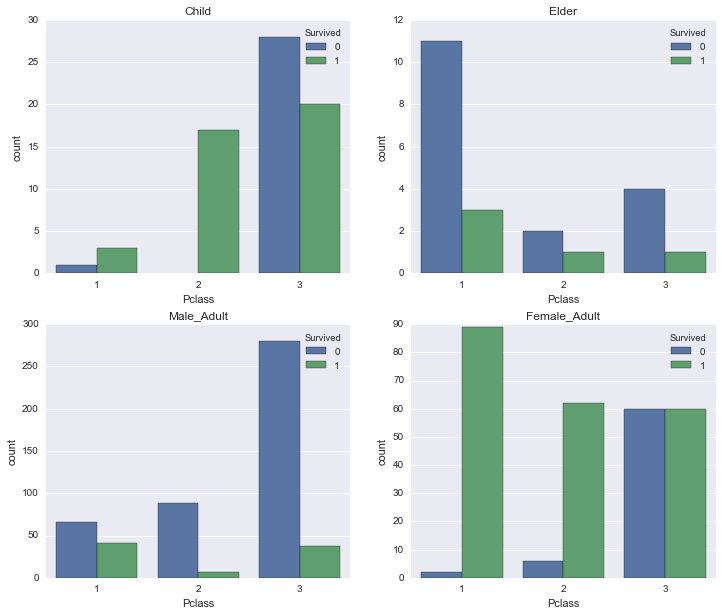

In [42]:
fig = plt.figure(figsize=(12, 10))
ax1 = fig.add_subplot(221)
sns.countplot(x='Pclass',hue='Survived', data=titanic.ix[titanic['Age_Child'] == 1], ax=ax1)
ax1.set_title('Child')

ax2 = fig.add_subplot(222)
sns.countplot(x='Pclass',hue='Survived', data=titanic.ix[titanic['Age_Elder'] == 1], ax=ax2)
ax2.set_title('Elder')

ax3 = fig.add_subplot(223)
sns.countplot(x='Pclass',hue='Survived', data=titanic.ix[(titanic['Age_Adult'] == 1) & (titanic['Sex_encode'] == 1)], ax=ax3)
ax3.set_title('Male_Adult')

ax4 = fig.add_subplot(224)
sns.countplot(x='Pclass',hue='Survived', data=titanic.ix[(titanic['Age_Adult'] == 1) & (titanic['Sex_encode'] == 0)], ax=ax4)
ax4.set_title('Female_Adult');

### 可以看出，年龄、性别、舱室的交叉效应对于生存率的影响也十分显著

In [43]:
Child_Pclass = pd.get_dummies(titanic['Age_Child'] * titanic['Pclass']).astype(int)
Child_Pclass.columns = ['Not_Child', 'Child_1', 'Child_2', 'Child_3']
Child_Pclass = Child_Pclass.drop('Not_Child', axis=1)
titanic = pd.concat([titanic, Child_Pclass], axis=1)
titanic.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked_S,Family_size,Name_len,Age_Child,Age_Adult,Age_Elder,Title,Child_1,Child_2,Child_3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,...,1,1,23,0,1,0,1,0,0,0


In [44]:
MaleAdult_Pclass = pd.get_dummies(titanic['Age_Adult'] * titanic['Sex_encode'] * titanic['Pclass']).astype(int)
MaleAdult_Pclass.columns = ['Not_MaleAdult', 'Male_1', 'Male_2', 'Male_3']
MaleAdult_Pclass = MaleAdult_Pclass.drop('Not_MaleAdult', axis=1)
titanic = pd.concat([titanic, MaleAdult_Pclass], axis=1)
titanic.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Age_Child,Age_Adult,Age_Elder,Title,Child_1,Child_2,Child_3,Male_1,Male_2,Male_3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,...,0,1,0,1,0,0,0,0,0,1


In [45]:
FemaleAdult_Pclass = pd.get_dummies(titanic['Age_Adult'] * (1-titanic['Sex_encode']) * titanic['Pclass']).astype(int)
FemaleAdult_Pclass.columns = ['Not_FemaleAdult', 'Female_1', 'Female_2', 'Female_3']
FemaleAdult_Pclass = FemaleAdult_Pclass.drop('Not_FemaleAdult', axis=1)
titanic = pd.concat([titanic, FemaleAdult_Pclass], axis=1)
titanic.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Title,Child_1,Child_2,Child_3,Male_1,Male_2,Male_3,Female_1,Female_2,Female_3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,...,1,0,0,0,0,0,1,0,0,0


In [48]:
titanic.columns

Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Ticket', u'Fare', u'Cabin', u'Embarked',
       u'Pclass_1', u'Pclass_2', u'Pclass_3', u'Sex_encode', u'Cabin_notnull',
       u'Embarked_C', u'Embarked_Q', u'Embarked_S', u'Family_size',
       u'Name_len', u'Age_Child', u'Age_Adult', u'Age_Elder', u'Title',
       u'Child_1', u'Child_2', u'Child_3', u'Male_1', u'Male_2', u'Male_3',
       u'Female_1', u'Female_2', u'Female_3'],
      dtype='object')

In [49]:
all_predictors = [
    'Age',
    'SibSp',
    'Parch',
    'Fare',
    'Pclass_1',
    'Pclass_2',
    'Pclass_3',
    'Sex_encode',
    'Cabin_notnull',
    'Embarked_C',
    'Embarked_Q',
    'Embarked_S',
    'Family_size',
    'Name_len',
    'Age_Child',
    'Age_Adult',
    'Age_Elder',
    'Title',
    'Child_1',
    'Child_2',
    'Child_3',
    'Male_1',
    'Male_2',
    'Male_3',
    'Female_1',
    'Female_2',
    'Female_3'
]

# 8 处理数据集

## 8.1 将特征工程的所有步骤写成函数

In [51]:
# 将特征工程的所有步骤编写成函数，方便后续的数据处理
def get_title(name):
    # Use a regular expression to search for a title.  Titles always consist of capital and lowercase letters, and end with a period.
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ''

def featureEngineering(df):
    # Fare列填补缺失值
    Fare_fillna = preprocessing.Imputer(strategy='median')
    Fare_fillna.fit(titanic[['Fare']])
    df[['Fare']] = Fare_fillna.transform(df[['Fare']])
    
    # Pclass列独热编码
    Pclass_encoder = preprocessing.OneHotEncoder(sparse=False)
    Pclass_encoder.fit(titanic[['Pclass']])
    Pclass = Pclass_encoder.transform(df[['Pclass']])
    Pclass = DataFrame(Pclass)
    Pclass.columns = ['Pclass_1', 'Pclass_2', 'Pclass_3']
    df = pd.concat([df, Pclass], axis=1)
    
    # Sex列二值编码
    Sex_encoder = preprocessing.LabelBinarizer()
    Sex_encoder.fit(titanic[['Sex']])
    Sex_encode = Sex_encoder.transform(df[['Sex']])
    Sex_encode = DataFrame(Sex_encode)
    Sex_encode.columns = ['Sex_encode']
    df = pd.concat([df, Sex_encode], axis=1)
    
    # Age填补缺失值
    Age_fillna = preprocessing.Imputer(strategy='median')
    Age_fillna.fit(df[['Age']])
    df[['Age']] = Age_fillna.transform(df[['Age']])
    
    # Cabin列根据是否缺失编码
    df['Cabin_notnull'] = df['Cabin'].notnull().astype(int)
    
    # Embarked列独热编码
    titanic.ix[titanic.Embarked.isnull(), 'Embarked'] = 'S'
    Embarked_encoder = preprocessing.LabelBinarizer()
    Embarked_encoder.fit(titanic.Embarked)
    df.ix[df.Embarked.isnull(), 'Embarked'] = 'S'
    Embarked = Embarked_encoder.transform(df.Embarked)
    Embarked = DataFrame(Embarked)
    Embarked.columns = ['Embarked_C', 'Embarked_Q', 'Embarked_S']
    df = pd.concat([df, Embarked], axis=1)
    
    # Family_size列
    df['Family_size'] = df['SibSp'] + df['Parch']
    
    # Name_len列
    df['Name_len'] = df['Name'].map(len)
    
    # 根据年龄段进行编码
    bins = [0, 12, 60, 100]
    group_names = ['Age_Child', 'Age_Adult', 'Age_Elder']
    age_cut = pd.get_dummies(pd.cut(df.Age, bins, labels=group_names)).astype(int)
    df = pd.concat([df, age_cut], axis=1)
    
    # Title列
    df_titles = df["Name"].map(get_title)
    df_titles = df_titles.fillna("Mr")
    
    title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Dr": 5, "Rev": 6, "Major": 7, "Col": 7, "Mlle": 8,
                     "Mme": 8, "Don": 9, "Lady": 10, "Countess": 10, "Jonkheer": 10, "Sir": 9, "Capt": 7, "Ms": 2}

    df['Title'] = df_titles.map(title_mapping)
    df['Title'] = df['Title'].fillna(1)
    
    # 儿童舱室
    Child_Pclass = pd.get_dummies(df['Age_Child'] * df['Pclass']).astype(int)
    Child_Pclass.columns = ['Not_Child', 'Child_1', 'Child_2', 'Child_3']
    Child_Pclass = Child_Pclass.drop('Not_Child', axis=1)
    df = pd.concat([df, Child_Pclass], axis=1)
    
    # 男性成年人舱室
    MaleAdult_Pclass = pd.get_dummies(df['Age_Adult'] * df['Sex_encode'] * df['Pclass']).astype(int)
    MaleAdult_Pclass.columns = ['Not_MaleAdult', 'Male_1', 'Male_2', 'Male_3']
    MaleAdult_Pclass = MaleAdult_Pclass.drop('Not_MaleAdult', axis=1)
    df = pd.concat([df, MaleAdult_Pclass], axis=1)
    
    # 女性成年人舱室
    FemaleAdult_Pclass = pd.get_dummies(df['Age_Adult'] * (1-df['Sex_encode']) * df['Pclass']).astype(int)
    FemaleAdult_Pclass.columns = ['Not_FemaleAdult', 'Female_1', 'Female_2', 'Female_3']
    FemaleAdult_Pclass = FemaleAdult_Pclass.drop('Not_FemaleAdult', axis=1)
    df = pd.concat([df, FemaleAdult_Pclass], axis=1)
    
    return df

## 8.2 训练集

In [54]:
titanic = pd.read_csv('../data/train.csv')
titanic = featureEngineering(titanic)
titanic.to_csv('../data/train_preprocessed.csv', index=None)

In [55]:
test = pd.read_csv('../data/test.csv')
test = featureEngineering(test)
test.to_csv('../data/test_preprocessed.csv', index=None)